In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
display(customer_df.shape)
customer_df.head()

(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
customer_df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [4]:
cols = []
for column in customer_df.columns:
    cols.append(column.lower())
customer_df.columns = cols

In [5]:
# customer_df.columns

In [6]:
customer_df.columns= customer_df.columns. str. replace(' ','_')

In [7]:
customer_df['effective_to_date']= pd.to_datetime(customer_df['effective_to_date'])

In [8]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective_to_date              9134 non-null   datetime64[ns]
 7   employmentstatus               9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location_code                  9134 non-null   object        
 11  marital_status   

In [9]:
customer_df['number_of_open_complaints'].value_counts()  # should be categorical as it is devided to categories

0    7252
1    1011
2     374
3     292
4     149
5      56
Name: number_of_open_complaints, dtype: int64

In [10]:
customer_df['number_of_open_complaints']= customer_df['number_of_open_complaints'].astype(str)

In [11]:
#Check all unique values of columns
customer_df.nunique()

customer                         9134
state                               5
customer_lifetime_value          8041
response                            2
coverage                            3
education                           5
effective_to_date                  59
employmentstatus                    5
gender                              2
income                           5694
location_code                       3
marital_status                      3
monthly_premium_auto              202
months_since_last_claim            36
months_since_policy_inception     100
number_of_open_complaints           6
number_of_policies                  9
policy_type                         3
policy                              9
renew_offer_type                    4
sales_channel                       4
total_claim_amount               5106
vehicle_class                       6
vehicle_size                        3
dtype: int64

In [12]:
def cont_discr(df):
    discrete = []
    continuous = []
    for col in df:
        if df[col].nunique() <= 10:
            discrete.append(col)
        else:
            continuous.append(col)
    return discrete,continuous

In [13]:
cont_discr(customer_df)

(['state',
  'response',
  'coverage',
  'education',
  'employmentstatus',
  'gender',
  'location_code',
  'marital_status',
  'number_of_open_complaints',
  'number_of_policies',
  'policy_type',
  'policy',
  'renew_offer_type',
  'sales_channel',
  'vehicle_class',
  'vehicle_size'],
 ['customer',
  'customer_lifetime_value',
  'effective_to_date',
  'income',
  'monthly_premium_auto',
  'months_since_last_claim',
  'months_since_policy_inception',
  'total_claim_amount'])

In [14]:
numeric_continuous = customer_df[['customer_lifetime_value',
  'income',
  'monthly_premium_auto',
  'months_since_last_claim',
  'months_since_policy_inception',
  'total_claim_amount']]
numeric_continuous

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,32,5,384.811147
1,6979.535903,0,94,13,42,1131.464935
2,12887.431650,48767,108,18,38,566.472247
3,7645.861827,0,106,18,65,529.881344
4,2813.692575,43836,73,12,44,138.130879
...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,198.234764
9130,3096.511217,21604,79,14,28,379.200000
9131,8163.890428,0,85,9,37,790.784983
9132,7524.442436,21941,96,34,3,691.200000


In [15]:
customer_df.isnull().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

<AxesSubplot:>

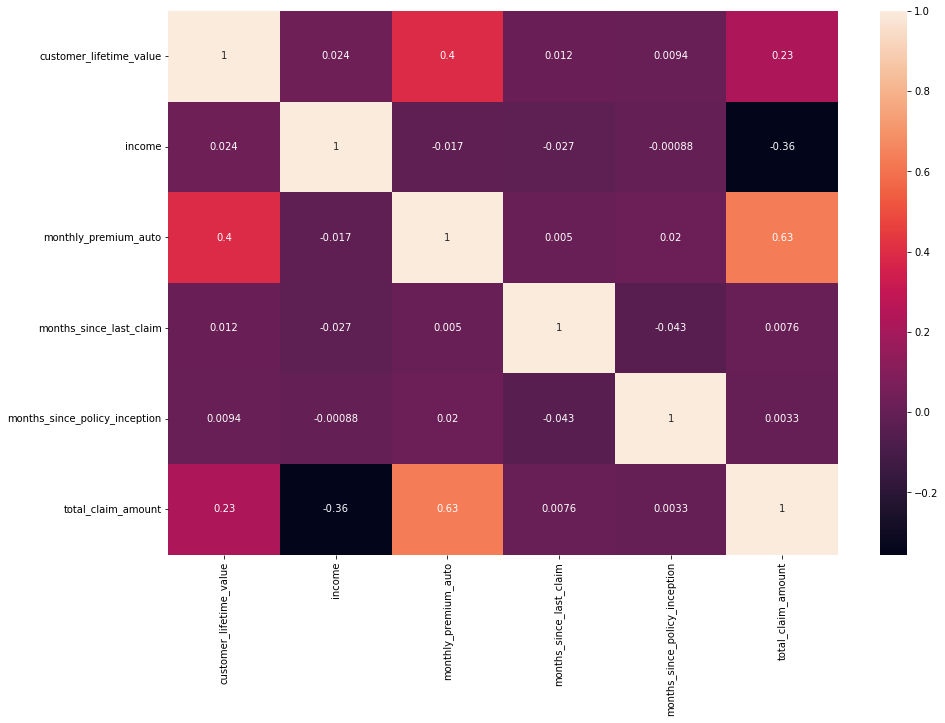

In [16]:
plt.figure(figsize=(15, 10))
sns.heatmap(numeric_continuous.corr(), annot=True)

In [16]:
### there is a pretty high correlation between 'total claim amount' and 'monthly premium auto'
### the second highest correlation is between 'monthly premium auto' and 'customer lifetime value'

In [17]:
customer_df['income'].value_counts()  # a lot of 0.. i will try to predict what is the missing income value based on the other variables

0        2317
95697      12
27972       7
25370       7
61108       7
         ... 
36529       1
25859       1
38179       1
70190       1
21941       1
Name: income, Length: 5694, dtype: int64

<AxesSubplot:>

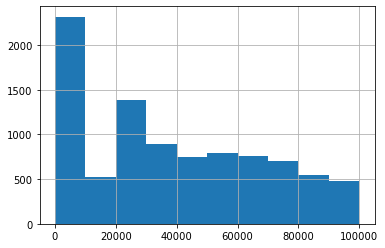

In [18]:
customer_df['income'].hist()

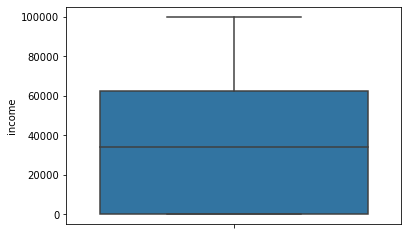

In [19]:
sns.boxplot(y=customer_df['income'])
plt.show()

In [20]:
numericals_with_income = numeric_continuous.loc[numeric_continuous['income'] > 0]
numericals_with_income

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,32,5,384.811147
2,12887.431650,48767,108,18,38,566.472247
4,2813.692575,43836,73,12,44,138.130879
5,8256.297800,62902,69,14,94,159.383042
6,5380.898636,55350,67,0,13,321.600000
...,...,...,...,...,...,...
9127,5032.165498,66367,64,6,48,307.200000
9128,4100.398533,47761,104,16,58,541.282007
9129,23405.987980,71941,73,18,89,198.234764
9130,3096.511217,21604,79,14,28,379.200000


In [21]:
X_income = numericals_with_income.drop(['income','months_since_policy_inception'],axis=1)
y_income = numericals_with_income['income']

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
X_normalized_income = pd.DataFrame(MinMaxScaler().fit_transform(X_income), columns=X_income.columns)

In [23]:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_normalized_income,y_income)
KNN.score(X_normalized_income,y_income)   # in 43% of the predictions we will be right

0.4324482910371131

In [24]:
X_all = numeric_continuous.drop(['income','months_since_policy_inception'],axis=1)
X_normalized_all = pd.DataFrame(MinMaxScaler().fit_transform(X_all), columns=X_all.columns)
y_all = numeric_continuous['income']

In [25]:
predicted_income = pd.Series(KNN.predict(X_normalized_all),name='predicted_income') 

In [26]:
predicted_income.value_counts(dropna=False)  

12843    21
12195    21
20978    19
52583    15
19121    15
         ..
18120     1
48736     1
46667     1
48019     1
50398     1
Name: predicted_income, Length: 2826, dtype: int64

In [27]:
customer_df = pd.concat([customer_df,predicted_income],axis=1)

In [28]:
customer_df['final_income'] =  np.where(customer_df['income']== 0, customer_df['predicted_income'], customer_df['income'])

In [29]:
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,predicted_income,final_income
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,56274,56274
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,16266,16266
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,25074,48767
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,34335,34335
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,33462,43836


In [30]:
display(customer_df['final_income'].mean())
display(customer_df['income'].mean())

44522.48456317057

37657.38000875848

<AxesSubplot:>

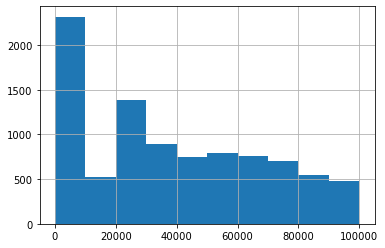

In [31]:
customer_df['income'].hist()

<AxesSubplot:>

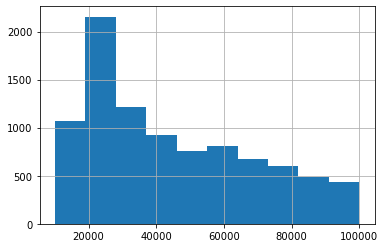

In [32]:
customer_df['final_income'].hist()

In [33]:
customer_df.drop(['income','predicted_income'],axis=1,inplace=True) #droping the columns we dont need of the income with missing values and not fully corecct income
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,final_income
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,Suburban,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,56274
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,Suburban,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,16266
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,Suburban,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,48767
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,Suburban,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,34335
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,Rural,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,43836


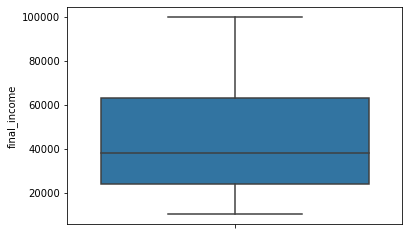

In [34]:
sns.boxplot(y=customer_df['final_income'])
plt.show()


In [35]:
#Check for Null values
customer_df.isnull().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
final_income                     0
dtype: int64

In [36]:
#Check for Nan values
customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
final_income                     0
dtype: int64

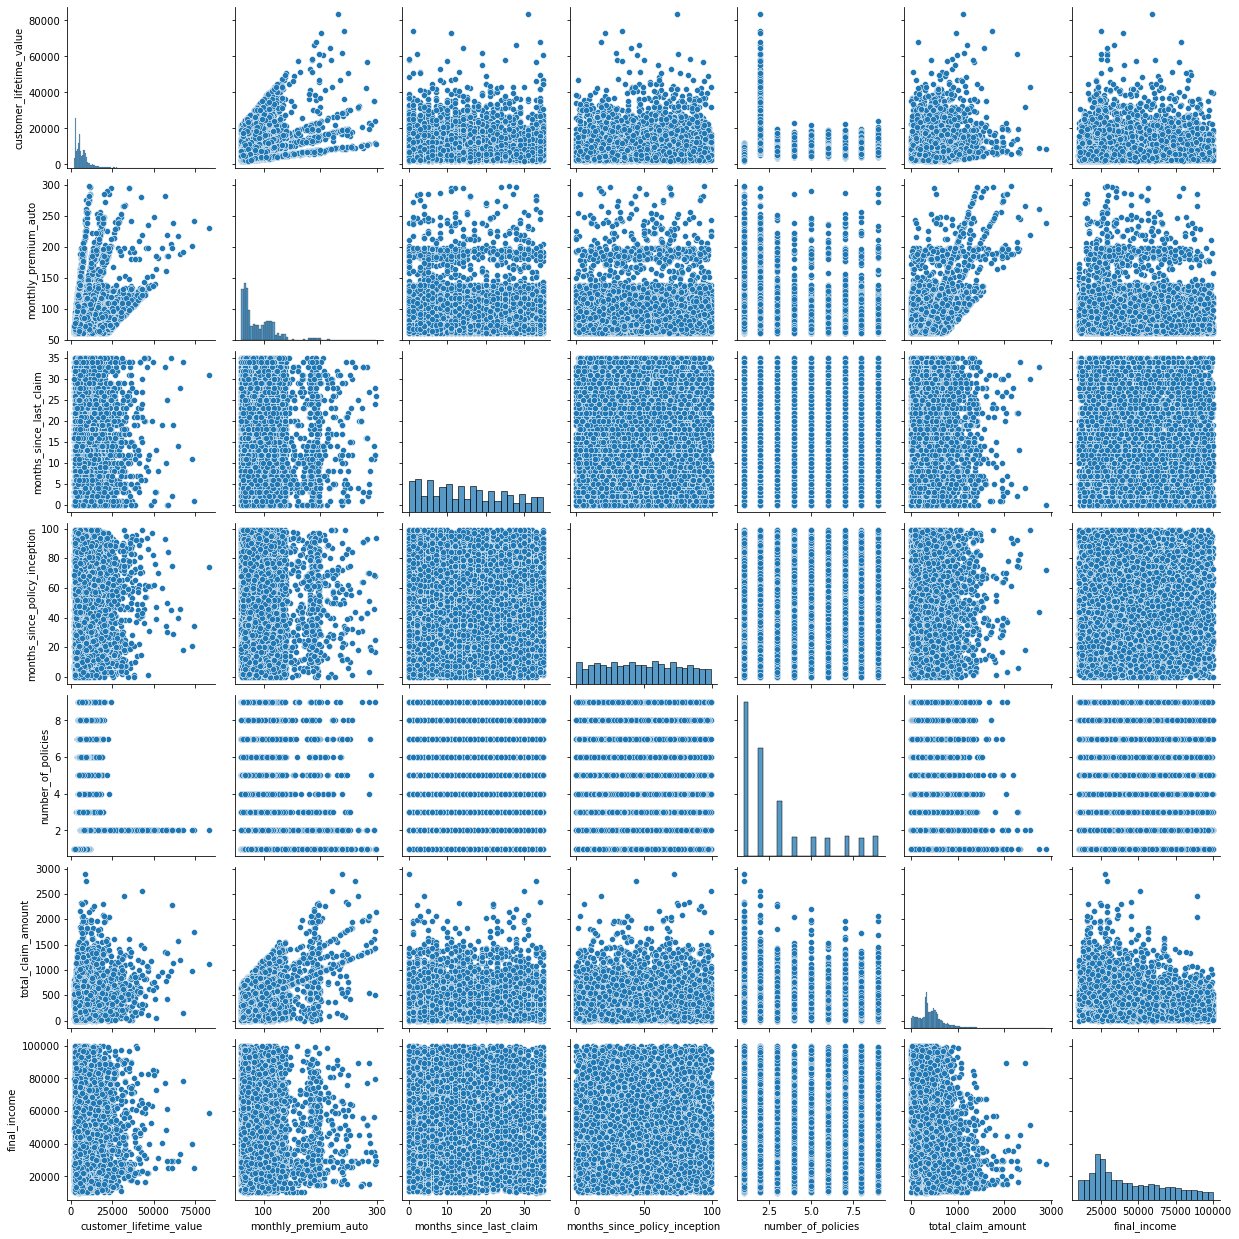

In [37]:
# sns.pairplot(customer_df)
# plt.show()

<Figure size 720x360 with 0 Axes>

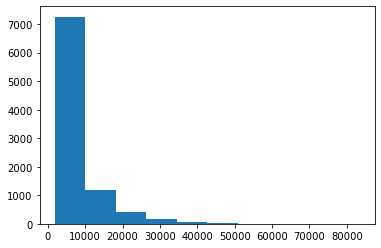

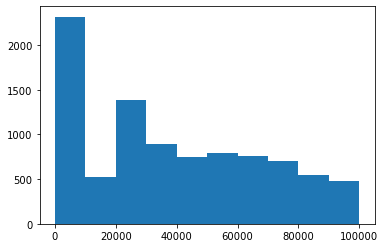

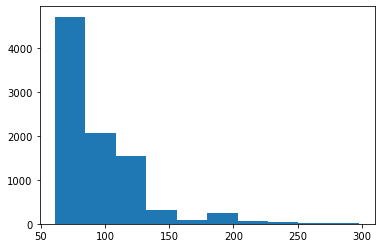

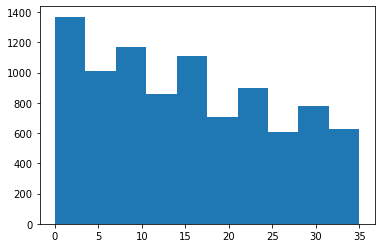

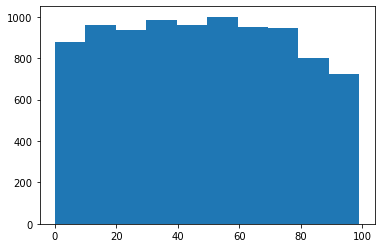

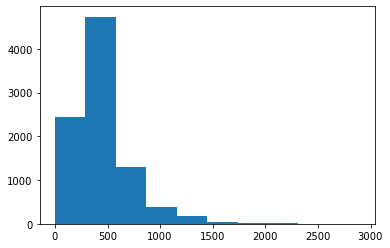

In [38]:
def plot_dis(df):
    plt.figure(figsize=(10,5))
    for i in df.columns:
        plt.figure()
        plt.hist(df[i])
        
plot_dis(numeric_continuous)

In [39]:
categorical=customer_df.select_dtypes(include = object)

In [40]:
categorical.head()
# looking at the categories, they all make sense as categorical data 

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,number_of_open_complaints,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,0,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,0,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,0,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,0,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,0,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [39]:
customer_df['response'].value_counts()

No     7826
Yes    1308
Name: response, dtype: int64

In [51]:
customer_df['coverage'].value_counts()

Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64

In [47]:
customer_df['renew_offer_type'].value_counts()

Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: renew_offer_type, dtype: int64

In [48]:
customer_df['sales_channel'].value_counts()

Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: sales_channel, dtype: int64

In [53]:
customer_df['gender'].value_counts()

F    4658
M    4476
Name: gender, dtype: int64

In [54]:
customer_df['policy'].value_counts()

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

In [ ]:
#Does any column contain alpha and numeric data? Decide how to clean it
#'policy' contain alpha and numeric data, but the numbers in the name of the category only devides him to categories

In [55]:
customer_df['policy_type'].value_counts() #this column seems unnecessary because it repets the column 'policy'

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64

In [47]:
categorical.drop(labels=['policy'], axis=1, inplace=True)
categorical

C:\Users\oshi\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,number_of_open_complaints,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,0,Corporate Auto,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,0,Personal Auto,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,0,Personal Auto,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,0,Corporate Auto,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,0,Personal Auto,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,0,Personal Auto,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,0,Corporate Auto,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,3,Corporate Auto,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,0,Personal Auto,Offer3,Branch,Four-Door Car,Large


In [51]:
categorical.nunique()

customer                     9134
state                           5
response                        2
coverage                        3
education                       5
employmentstatus                5
gender                          2
location_code                   3
marital_status                  3
number_of_open_complaints       6
policy_type                     3
renew_offer_type                4
sales_channel                   4
vehicle_class                   6
vehicle_size                    3
dtype: int64

In [ ]:
# 'customer' also contain alpha numeric values but he is unique because the values in it basically represents "names"
# so i would keep it as it is